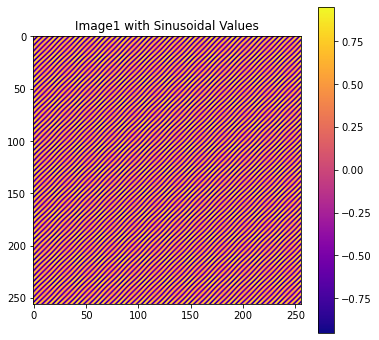

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 256x256 matrix
n = 256
image1 = np.zeros((n, n))

# Populate the matrix
for i in range(n):
    for j in range(n):
        image1[i, j] = np.sin(2 * np.pi * (i + j) / 5)

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(image1, cmap='plasma')  # 'viridis' colormap is used by default, you can change it

# Add colorbar
plt.colorbar()

# Set title
plt.title('Image1 with Sinusoidal Values')

# Show the plot
plt.show()


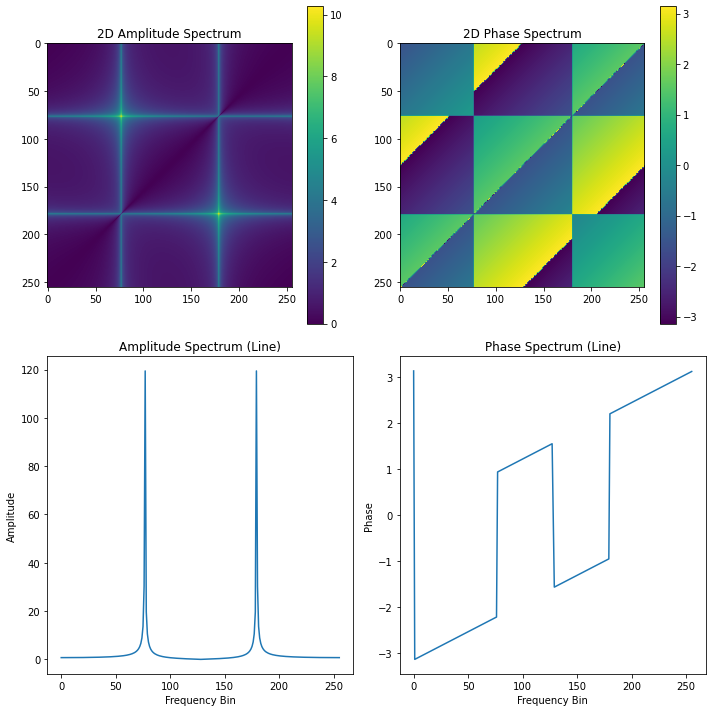

In [51]:
# Compute the 2D Fourier Transform
fft_result = np.fft.fft2(image1)
fft_shifted = np.fft.fftshift(fft_result)

# Calculate amplitude and phase spectra
amplitude_spectrum = np.abs(fft_shifted)
phase_spectrum = np.angle(fft_shifted)

plt.figure(figsize=(10, 10))

# Amplitude Spectrum (2D)
plt.subplot(2, 2, 1)
plt.imshow(np.log1p(amplitude_spectrum), cmap='viridis')
plt.title('2D Amplitude Spectrum')
plt.colorbar()

# Phase Spectrum (2D)
plt.subplot(2, 2, 2)
plt.imshow(phase_spectrum, cmap='viridis')
plt.title('2D Phase Spectrum')
plt.colorbar()

# Select a row or column for line plots
selected_row = amplitude_spectrum.shape[0] // 2  # Middle row
amplitude_line = amplitude_spectrum[selected_row, :]
phase_line = phase_spectrum[selected_row, :]

# Amplitude Spectrum (Line)
plt.subplot(2, 2, 3)
plt.plot(amplitude_line)
plt.title('Amplitude Spectrum (Line)')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

# Phase Spectrum (Line)
plt.subplot(2, 2, 4)
plt.plot(phase_line)
plt.title('Phase Spectrum (Line)')
plt.xlabel('Frequency Bin')
plt.ylabel('Phase')

plt.tight_layout()
plt.show()

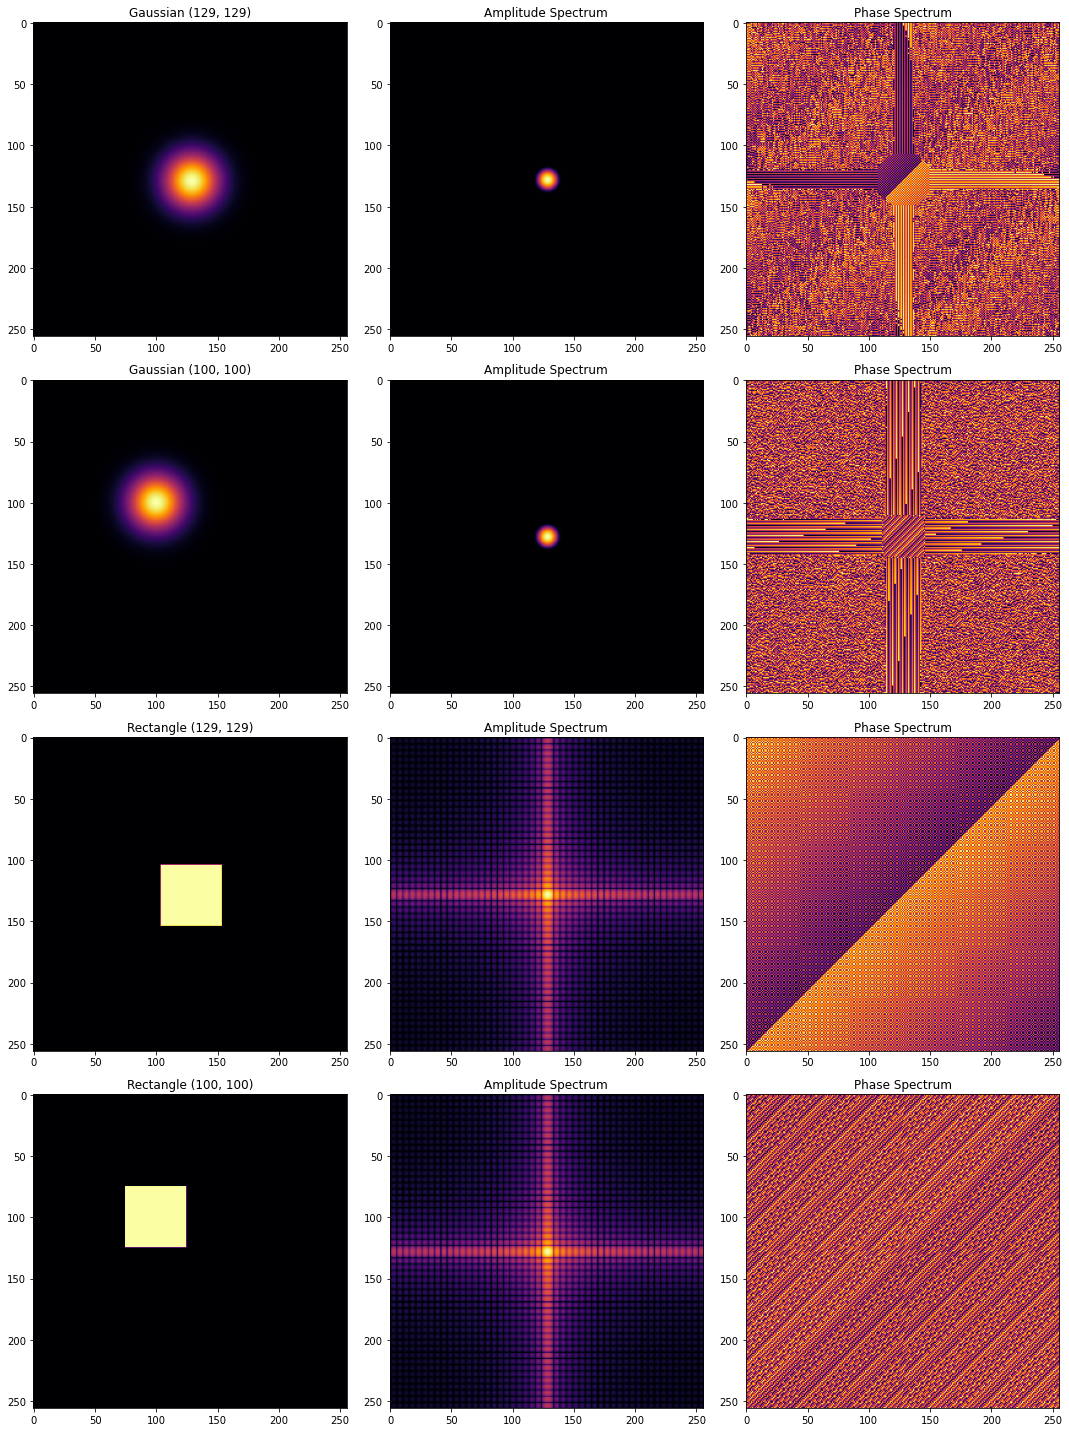

In [52]:

def create_gaussian(center, sigma, size=(n, n)):
    x0, y0 = center
    x = np.arange(size[0])
    y = np.arange(size[1])
    X, Y = np.meshgrid(x, y)
    return np.exp(-((X - x0)**2 + (Y - y0)**2) / (2 * sigma**2))

def create_rectangle(center, width, height, size=(n, n)):
    x0, y0 = center
    rectangle = np.zeros(size)
    rectangle[y0 - height // 2:y0 + height // 2, x0 - width // 2:x0 + width // 2] = 1
    return rectangle

# Create images
sigma = 16  # Standard deviation for Gaussian
width, height = 50, 50  # Dimensions for rectangle
gaussian1 = create_gaussian((129, 129), sigma)
gaussian2 = create_gaussian((100, 100), sigma)
rectangle1 = create_rectangle((129, 129), width, height)
rectangle2 = create_rectangle((100, 100), width, height)

# Fourier Analysis Function
def fourier_analysis(image):
    fft_result = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft_result)
    amplitude_spectrum = np.abs(fft_shifted)
    phase_spectrum = np.angle(fft_shifted)
    return amplitude_spectrum, phase_spectrum

# Plotting
images = [gaussian1, gaussian2, rectangle1, rectangle2]
titles = ['Gaussian (129, 129)', 'Gaussian (100, 100)', 'Rectangle (129, 129)', 'Rectangle (100, 100)']
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

for i, image in enumerate(images):
    amplitude_spectrum, phase_spectrum = fourier_analysis(image)
    
    axs[i, 0].imshow(image, cmap='inferno')
    axs[i, 0].set_title(titles[i])

    axs[i, 1].imshow(np.log1p(amplitude_spectrum), cmap='inferno')
    axs[i, 1].set_title('Amplitude Spectrum')

    axs[i, 2].imshow(phase_spectrum, cmap='inferno')
    axs[i, 2].set_title('Phase Spectrum')

plt.tight_layout()
plt.show()


In [ ]:
#Real images and filters

